# Perceptron [Keras]
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [perceptron_Keras.ipynb](https://github.com/diegoinacio/machine-learning-notebooks/blob/master/Deep-Learning-Models/perceptron_Keras.ipynb)
---
Perceptron or binary logistic regression algorithm using Keras [using TensorFlow as a framework] library and MNIST dataset.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

In [2]:
plt.rcParams['figure.figsize'] = (16, 8)

In [3]:
mnist = tf.keras.datasets.mnist
[X_train, Y_train],[X_test, Y_test] = mnist.load_data()

# data cleaning
# using only zeros and ones
X_train = X_train[Y_train <= 1]
Y_train = Y_train[Y_train <= 1]
X_test = X_test[Y_test <= 1]
Y_test = Y_test[Y_test <= 1]

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)

X_train: (12665, 28, 28)
Y_train: (12665,)
X_test: (2115, 28, 28)
Y_test: (2115,)


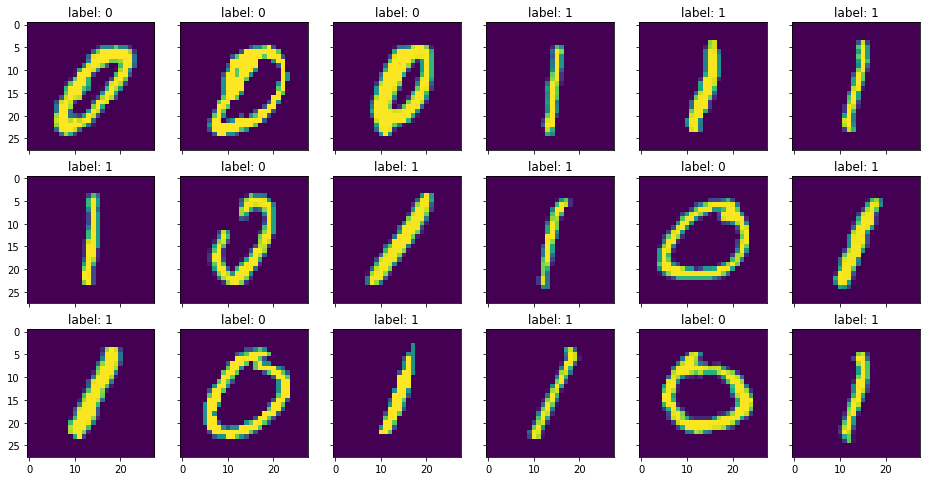

In [4]:
fig, AX = plt.subplots(3, 6, sharex=True, sharey=True)

np.random.seed(1234)
for ax in AX.ravel():
    rindex = np.random.randint(Y_train.size)
    ax.imshow(X_train[rindex])
    ax.set_title('label: {}'.format(Y_train[rindex]))
plt.grid(False)

In [5]:
# data preparation
# scales, dimensions and dtypes
x_train, y_train = X_train/255, Y_train[np.newaxis].T
x_test, y_test = X_test/255, Y_test[np.newaxis].T

x_train = x_train.astype(np.float32).reshape(-1, 28*28)
y_train = y_train.astype(np.float32)
x_test = x_test.astype(np.float32).reshape(-1, 28*28)
y_test = y_test.astype(np.float32)

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (12665, 784)
y_train: (12665, 1)
x_test: (2115, 784)
y_test: (2115, 1)


## Perceptron
---
![perceptron](sourceimages/perceptron.png "Perceptron")

In [6]:
EPOCHS = 500  # epochs
ALPHA = 0.001 # learning rate
BATCH = 100   # batch size

# m is the number of examples
# n_x is the input size 28x28=784
m, n_x = x_train.shape

# model
model = tf.keras.Sequential([
    tf.keras.layers.Input(n_x),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    loss='mean_squared_error',
    optimizer='SGD',
    lr=ALPHA,
    metrics=['accuracy']
)

# loss and accuracy storage
loss_plot = []; accA_plot = []

for epoch in range(EPOCHS + 1):
    # randomic batch definition
    rbatch = np.random.choice(Y_train.size, size=BATCH)
    # training, metrics and storage
    model.fit(x_train[rbatch], y_train[rbatch], epochs=1, verbose=0)
    loss_plot += [e*100 for e in model.history.history['loss']]
    accA_plot += [e*100 for e in model.history.history['accuracy']]
    if (not epoch % 100) and (epoch != 0):
        print(f'epoch: {epoch:04d} | loss: {loss_plot[-1]:.3f} | accuracy: {accA_plot[-1]:06.2f} %')

w_ = model.weights[0].numpy() # store W and B for visualization and test

epoch: 0100 | loss: 1.304 | accuracy: 100.00 %
epoch: 0200 | loss: 0.848 | accuracy: 100.00 %
epoch: 0300 | loss: 0.838 | accuracy: 100.00 %
epoch: 0400 | loss: 0.894 | accuracy: 099.00 %
epoch: 0500 | loss: 0.330 | accuracy: 100.00 %


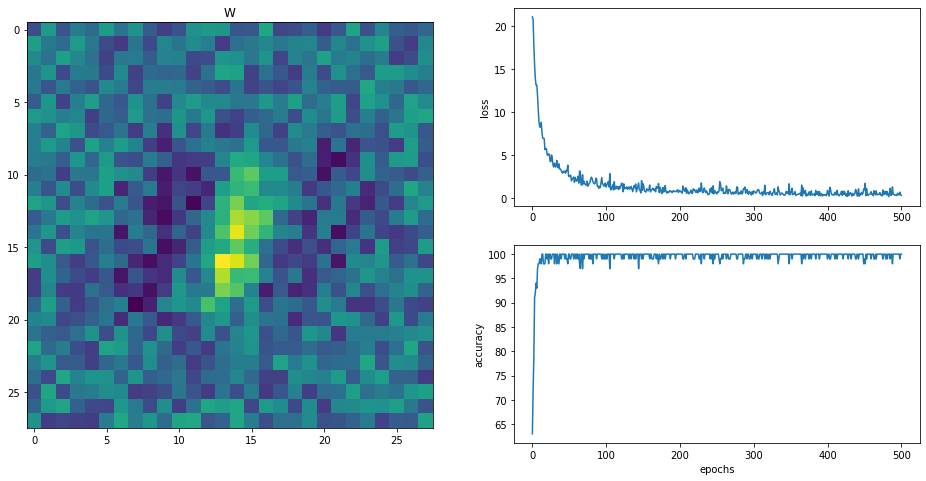

In [7]:
axA = plt.subplot(121)
axA.imshow(w_.T.reshape(28, 28))
cb = axA.set_title('W')

axB = plt.subplot(222)
axB.plot(loss_plot)
axB.set_ylabel('loss')

axC = plt.subplot(224)
axC.plot(accA_plot)
axC.set_ylabel('accuracy')

plt.xlabel('epochs')

plt.show()

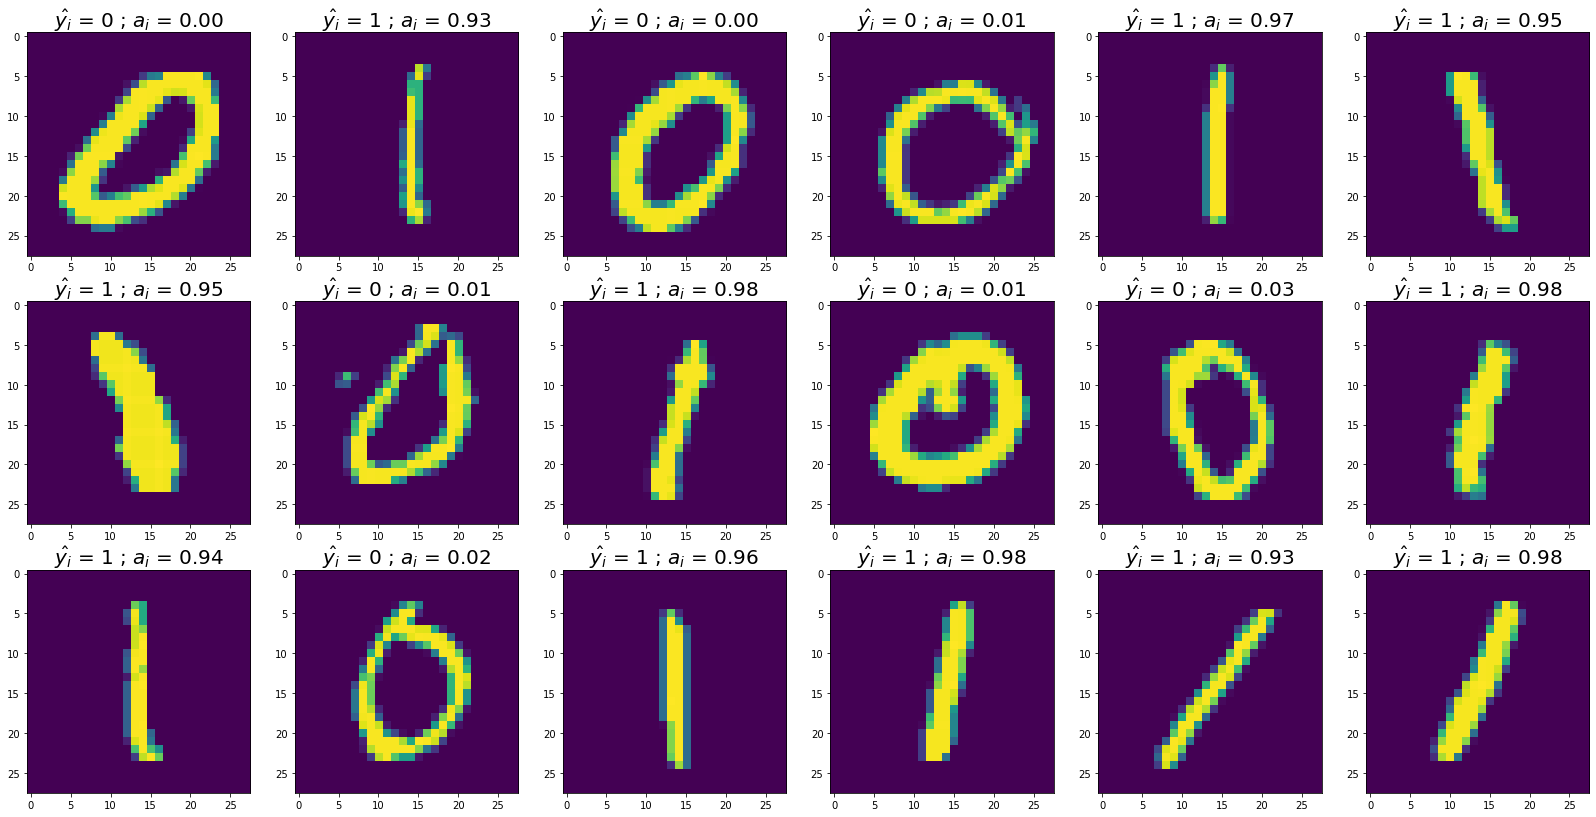

In [8]:
fig, AX = plt.subplots(3, 6, figsize=(2048//72, 1024//72))
AX = [b for a in AX for b in a]

pred = model.predict(x_test)

np.random.seed(1)
for ax in AX:
    index = np.random.randint(y_test.size)
    a_ = pred[index]
    y_ = 1 if a_ > 0.5 else 0
    if y_ == y_test[index]:
        ax.imshow(x_test[index].reshape(28, 28))
    else:
        ax.imshow(1 - x_test[index].reshape(28, 28))
    ax.set_title(r'$\hat{y_i}$ = ' + str(y_) + r' ; $a_i$ = {:.02f}'.format(float(a_)), fontsize=20)